# 2 Support Vector Machines. (10 points)
In this assignment, you will be using the credit card fraud detection dataset from https://www.kaggle.com/ datasets/mlg-ulb/creditcardfraud to train and test a Support Vector Machine (SVM) classifier. Your task is to:

In [2]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn
%matplotlib inline

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


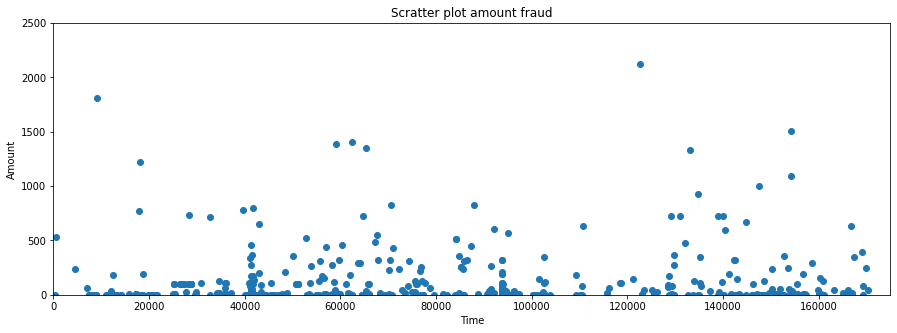

In [7]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,5))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [8]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0]                                                     
print('There are only {} frauds where the amount was bigger than 1000 over {} frauds'.format(str(nb_big_fraud),str(df_fraud.shape[0]) ))

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


In [9]:
number_fraud = len(df[df.Class == 1])
number_no_fraud = len(df[df.Class == 0])
print('There are only {}  frauds in the original dataset, even though there are {} no frauds in the dataset.'.format(str(number_fraud),str(number_no_fraud)))

There are only 492  frauds in the original dataset, even though there are 284315 no frauds in the dataset.


In [10]:
print("The accuracy of the classifier then would be : {} which is the number of good classification over the number of tuple to classify".format(str((284315-492)/284315)))

The accuracy of the classifier then would be : 0.998269524998681 which is the number of good classification over the number of tuple to classify


In [11]:
df_corr = df.corr() 
# df_corr

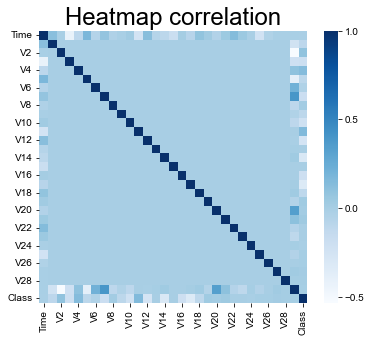

In [12]:
plt.figure(figsize=(6,5))
seaborn.heatmap(df_corr, cmap='Blues') 
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [13]:
# pip install -U imbalanced-learn

In [14]:
# Creating the modeling dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Oversampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

In [15]:
y = df['Class']
del df['Class']
X = df
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


### 1. Split the dataset into training and testing sets.
### 2. Perform a stratified split to take care of the class imbalance.

In [16]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

The number of records in the training dataset is 227845
The number of records in the test dataset is 56962
The training dataset has 227451 records for the majority class and 394 records for the minority class.


### 3. Use sklearn to deal with the class imbalance and experiment the various ways we can deal with class imbalance, for e.g, Undersampling, Oversampling, SMOTE.

In [17]:
# Randomly over sample the minority class
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_ros).items()))

[(0, 227451), (1, 227451)]


In [18]:
X_train_ros = np.array(X_train_ros)
X_train_ros

array([[ 1.43352000e+05,  1.95504092e+00, -3.80782711e-01, ...,
         4.51682478e-02, -4.71447917e-02,  9.99000000e+00],
       [ 1.17173000e+05, -4.00975239e-01, -6.26942769e-01, ...,
        -3.70468822e-01, -1.44791686e-01,  4.59000000e+01],
       [ 1.49565000e+05,  7.25090164e-02,  8.20565650e-01, ...,
         2.06394866e-01,  7.02877702e-02,  1.19900000e+01],
       ...,
       [ 6.35780000e+04, -6.39191253e-01, -8.55947886e-02, ...,
        -6.19624216e-02, -6.26865318e-02,  2.90180000e+02],
       [ 1.34766000e+05, -7.96525366e-02,  3.22201046e+00, ...,
         6.68496566e-01,  5.95609829e-01,  1.00000000e+00],
       [ 4.99850000e+04, -1.55421637e+00,  1.69422929e+00, ...,
         3.95200622e-01,  2.76930321e-02,  3.60000000e+02]])

In [19]:
y_train_ros = np.array(y_train_ros)
y_train_ros

array([0, 0, 0, ..., 1, 1, 1])

Text(0.5, 1.0, 'Random Over Sampling')

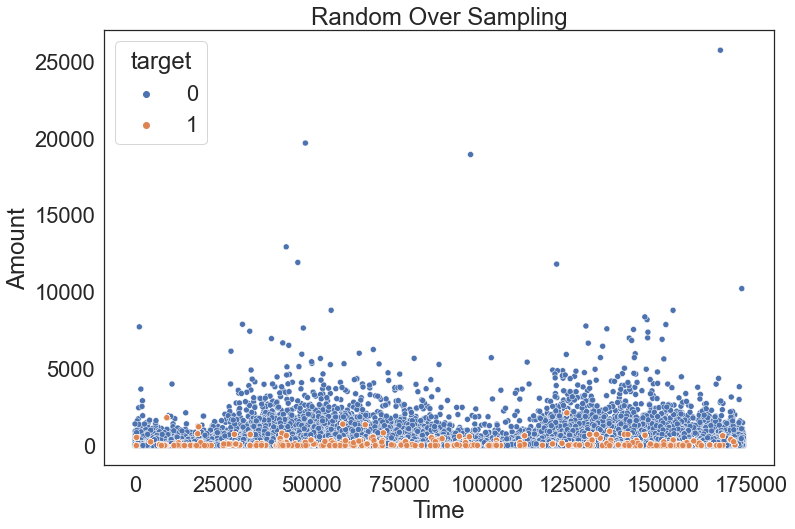

In [20]:
# Convert the data from numpy array to a pandas dataframe
df_ros = pd.DataFrame({'Time': X_train_ros[:, 0], 'Amount': X_train_ros[:, 29], 'target': y_train_ros})
# Plot the chart
plt.figure(figsize=(12, 8))
sns.scatterplot(x = 'Time', y = 'Amount', hue = 'target', data = df_ros)
plt.title('Random Over Sampling')

In [21]:
# Randomly over sample the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)
# Check the number of records after over sampling
print(sorted(Counter(y_train_smote).items()))

[(0, 227451), (1, 227451)]


Text(0.5, 1.0, 'SMOTE Over Sampling')

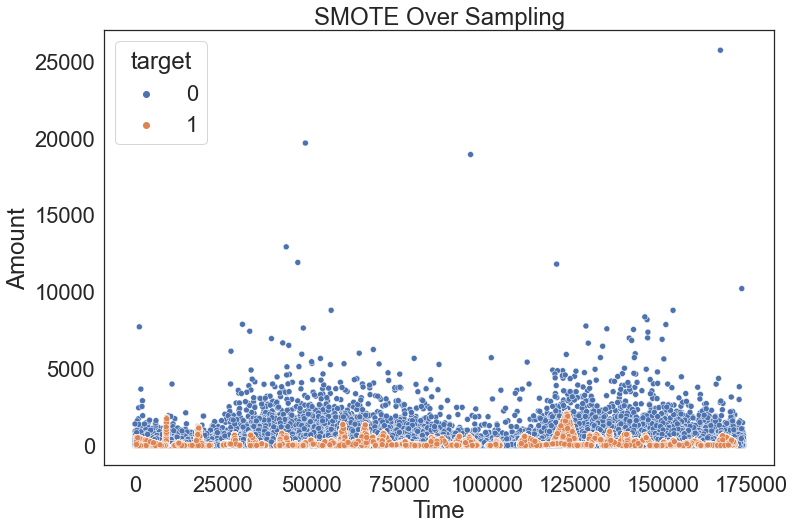

In [22]:
# Convert the data from numpy array to a pandas dataframe
X_train_smote = np.array(X_train_smote)
y_train_smote = np.array(y_train_smote)
df_smote = pd.DataFrame({'Time': X_train_smote[:, 0], 'Amount': X_train_smote[:, 29], 'target': y_train_smote})
# Plot the chart
plt.figure(figsize=(12, 8))
sns.scatterplot(x = 'Time', y = 'Amount', hue = 'target', data = df_smote)
plt.title('SMOTE Over Sampling')

In [23]:
# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)
# Check the number of records after under sampling
print(sorted(Counter(y_train_rus).items()))

[(0, 394), (1, 394)]


Text(0.5, 1.0, 'Random Under Sampling')

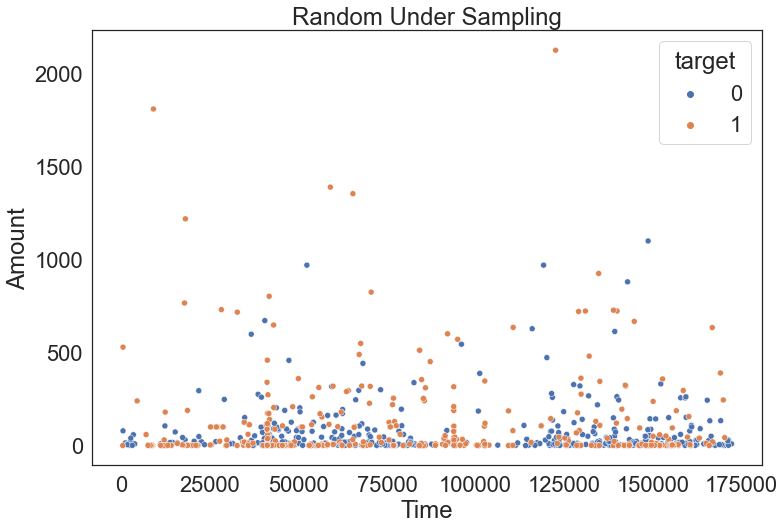

In [24]:
X_train_rus = np.array(X_train_rus)
y_train_rus = np.array(y_train_rus)
# Convert the data from numpy array to a pandas dataframe
df_rus = pd.DataFrame({'Time': X_train_rus[:, 0], 'Amount': X_train_rus[:, 29], 'target': y_train_rus})
# Plot the chart
plt.figure(figsize=(12, 8))
sns.scatterplot(x = 'Time', y = 'Amount', hue = 'target', data = df_rus)
plt.title('Random Under Sampling')


In [25]:
#group for plotting
df_train = df_smote
grouped_train = df_train.groupby('target')

#add bias to sample vectors
x = np.c_[X,np.ones(len(X))]

#initialize weight vector
w = np.zeros(len(x[0]))

In [26]:
import random
import time

### 4. Implement the basic Pegasos Algorithm from the paper https://home.ttic.edu/~nati/Publications/ PegasosMPB.pdf. This is in page 5, Fig 1.

In [27]:
from numpy import sign


class SVMPegasos():
    """Implementation of SVM with SGD with PEGASOS Algorithm"""
 
    def __init__(self, n_iter, lambda1):
       self.n_iter = n_iter
       self.lambda1 = lambda1
 
    def fit(self, X, Y):
      #  Y = list(Y)
      #  self.find_classes(Y)
      #  # convert all output values to +1 or -1
      #  Yn = [sign(y, self.positive_class) for y in Y]
      #  X = X.toarray()
       m, n_features = X.shape[0], X.shape[1]
       self.w = np.zeros( n_features )
       for i in range(self.n_iter):
           eta = 1. / (self.lambda1*(i+1))
           j = np.random.choice(m, 1)[0]
           x, y = X[j], Y[j]
           score = self.w.dot(x)
           if y*score < 1:
              self.w = (1 - eta*self.lambda1)*self.w + eta*y*x
           else:
              self.w = (1 - eta*self.lambda1)*self.w

    def predict(self,X,Y):
      y_pred = np.dot(X,self.w)
      pred = np.where(y_pred >=0.5, 1, 0)
      return pred
   
   

In [28]:
# Randomly over sample the minority class
smote = SMOTE(random_state=42)
X_test_smote, y_test_smote= smote.fit_resample(X_test, y_test)
# Check the number of records after over sampling
print(sorted(Counter(y_test_smote).items()))

[(0, 56864), (1, 56864)]


In [29]:
model = SVMPegasos(1000,10)
model.fit(X_train_smote,y_train_smote)
pred = model.predict(X_test_smote,y_test_smote)

In [30]:
pred

array([1, 1, 1, ..., 1, 1, 1])

In [33]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test_smote,pred)
print("Accuracy: \n")
acc

Accuracy: 



0.5000087929093978

### 5. Implementthemini-batchPegasosalgorithmfromthepaper https://home.ttic.edu/~nati/Publications/ PegasosMPB.pdf. Do not forget the projection step. This is in page 6, Fig 2.

In [32]:
def norm(x):
    """Calculate the l2 norm"""
    return np.sqrt(sum(x**2))

In [35]:
class miniBatchPegasos(object):
    """the Primal Estimated subgradient SOlver for Svm
    reference: Pegasos: Primal Estimated sub-GrAdient SOlver for SVM"""
    def __init__(self,ll=0.9,m=50,Ni=300,random_state=1):
        self.random_state = random_state
        self.Ni = Ni
        self.m = m # mini-batch size
        self.lambda1=ll
        
    def fit(self,X,y):
        N = len(y)
        X = np.hstack([X,np.ones((N,1))]) 
        rgen = np.random.RandomState(self.random_state)
        for i in range(self.Ni):
            if i ==0:
                theta_old = np.zeros((X.shape[1]))
            else:
                theta_old = theta_new1
            #print(theta_old)    
            n = i+1
            idx = rgen.randint(low=0,high=N,size=self.m)
            mu = 1/(self.lambda1*n)
            subgradiants = [yy*xx for yy,xx in zip(y[idx],X[idx,:]) if yy*theta_old.T.dot(xx)< 1]
            if len(subgradiants)==0:
                theta_new = theta_old*(1-mu*self.lambda1)
            else:
                theta_new = theta_old*(1-mu*self.lambda1) + mu*np.mean(subgradiants,axis=0)
                
            theta_new1 = np.min([1,1/(np.sqrt(self.lambda1)*norm(theta_new))])*theta_new # projection on B(0,1/sqrt(lambda))            
        self.theta = theta_new1
    def predict(self,X):
        N=X.shape[0]
        X = np.hstack([X,np.ones((N,1))]) 
        return np.array([np.where(x.dot(self.theta) > 0, 1,-1) for x in X])

In [36]:
model1 = miniBatchPegasos()
model1.fit(X_train_smote,y_train_smote)
pred = model1.predict(X_test_smote)
acc = accuracy_score(y_test_smote,pred)
print("Accuracy: \n")
acc

Accuracy: 



0.5